In [56]:
!pip install -U kaleido

### Importing the dependencies

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

In [58]:
df = pd.read_csv('/content/fraud_oracle.csv')
df.shape

(15420, 33)

In [59]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [60]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound              0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

## Data Visualisation

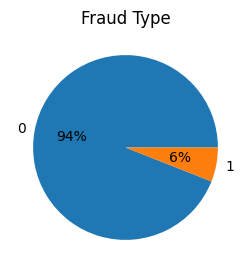

In [61]:
plt.figure(figsize=(3,3))
plt.pie(df.FraudFound.value_counts().values,labels=df.FraudFound.value_counts().index,  autopct='%.0f%%')
plt.title("Fraud Type")
plt.show()

Here we can see that the dataset is highly imbalanced, with the probability of an insurance being fraud is 6%.

In [62]:
df.loc[df['FraudFound'] == 'No','FraudFound'] = 0
df.loc[df['FraudFound'] == 'Yes','FraudFound'] = 1

df['FraudFound'] = df['FraudFound'].astype(int)

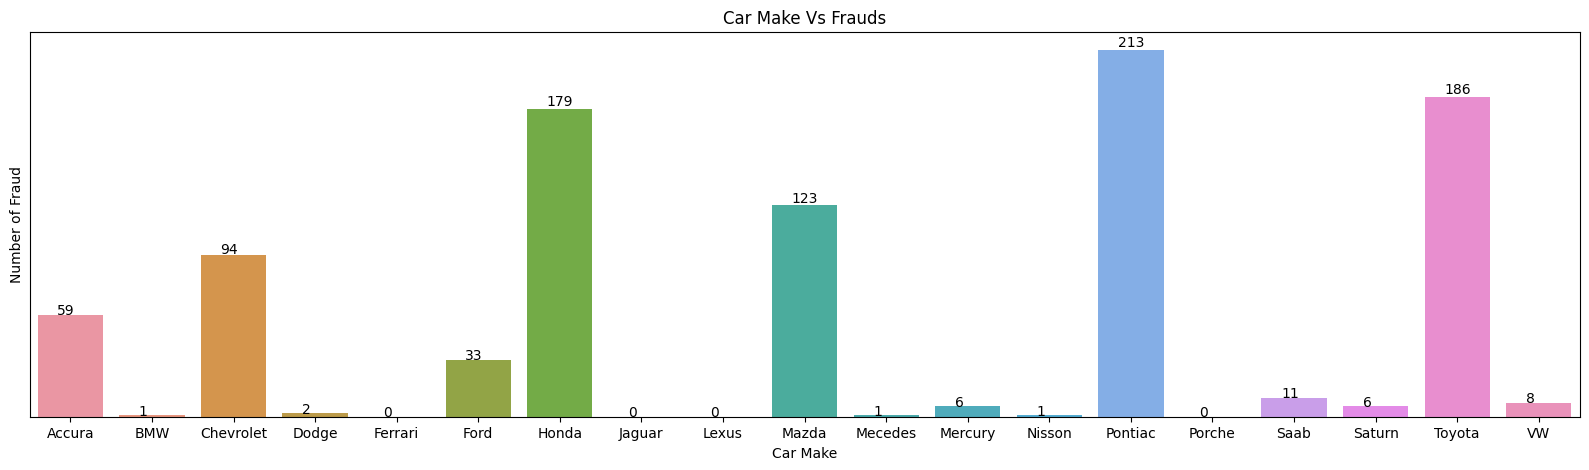

In [63]:
make = df.groupby('Make')['FraudFound'].sum()
plt.figure(figsize=(20,5))
plt.title("Car Make Vs Frauds")

ax = sns.barplot(x=make.index,y=make.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Car Make")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

Here we realise that consumers of Pontiac, Honda and Toyota are in majority of the fraud claims.

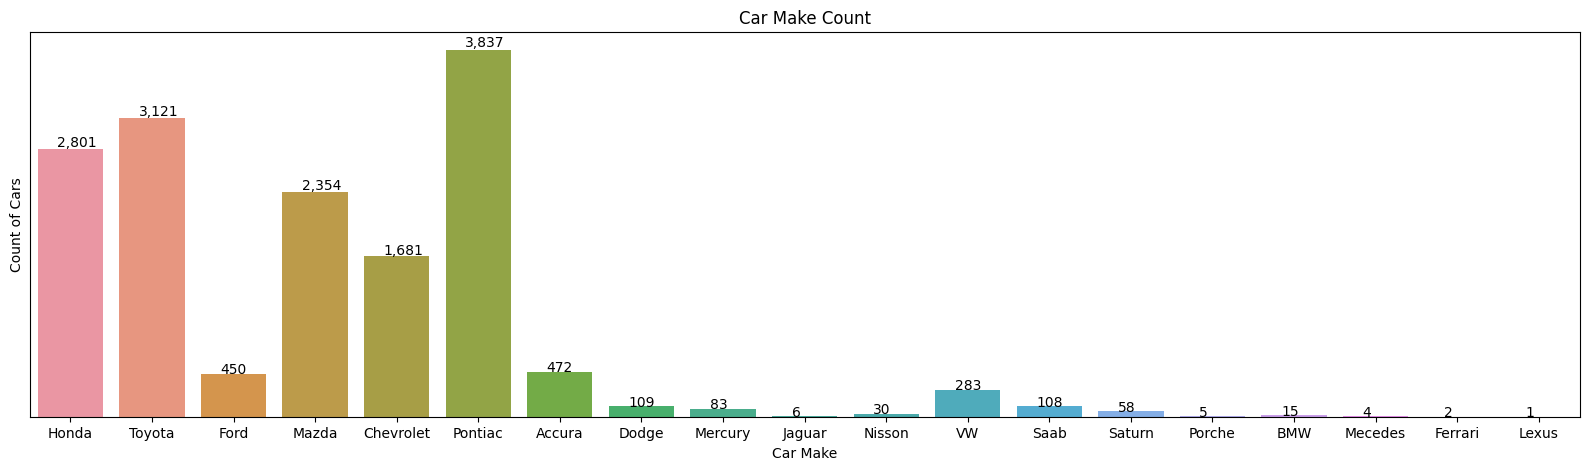

In [64]:
plt.figure(figsize=(20,5))
plt.title("Car Make Count")

ax = sns.countplot(x=df['Make'])
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Car Make")
plt.ylabel("Count of Cars");
plt.yticks([])
plt.show()

Here we realise why honda, toyota and pontiac have major number of claims. Its mainly due to the number of their accidents being higher.

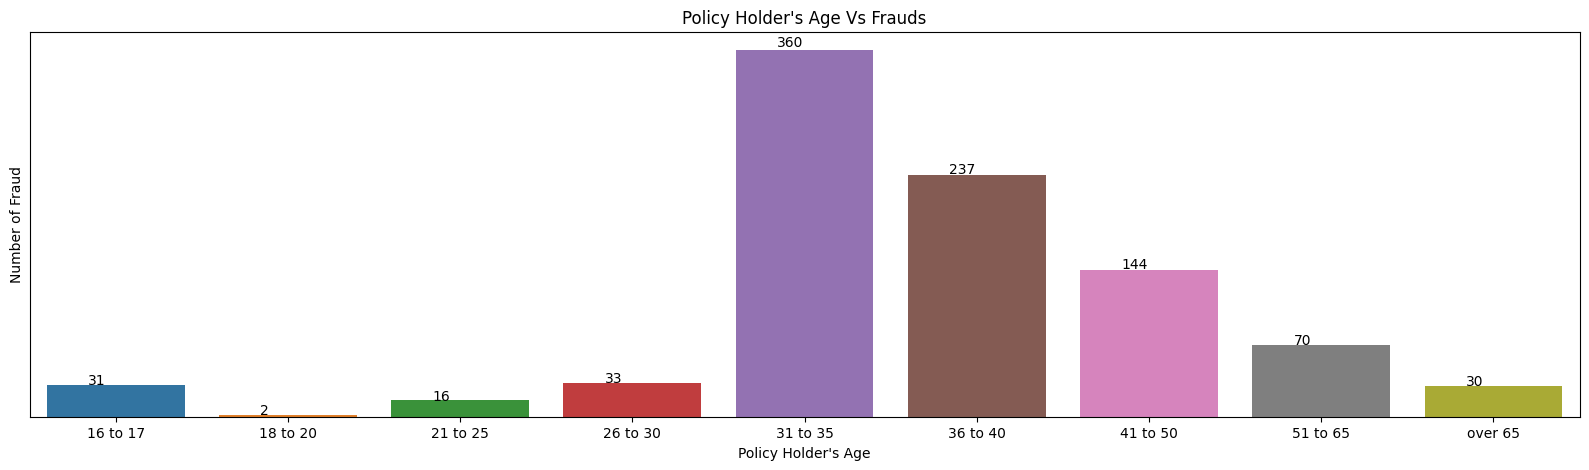

In [65]:
policyAge = df.groupby('AgeOfPolicyHolder')['FraudFound'].sum()
plt.figure(figsize=(20,5))
plt.title("Policy Holder's Age Vs Frauds")

ax = sns.barplot(x=policyAge.index,y=policyAge.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Policy Holder's Age")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

Here we can see that if the policy holder's age is from 36 to 40, he is more likely to commit a fraud whereas if his age is from 18 to 20, he is lesser liekly to commit the fraud.

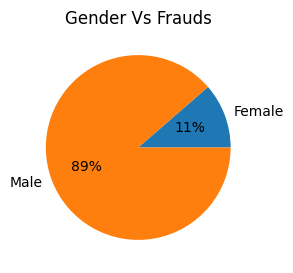

In [66]:
gender = df.groupby('Sex')['FraudFound'].sum()
plt.figure(figsize=(3,3))
plt.title("Gender Vs Frauds")

plt.pie(gender.values,labels=gender.index,  autopct='%.0f%%')
plt.show()

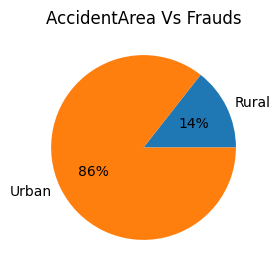

In [67]:
accidentArea = df.groupby('AccidentArea')['FraudFound'].sum()

plt.figure(figsize=(3,3))
plt.title("AccidentArea Vs Frauds")

plt.pie(accidentArea.values,labels=accidentArea.index,  autopct='%.0f%%')
plt.show()

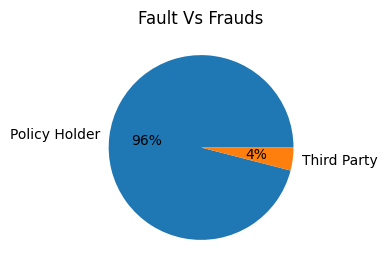

In [68]:
fault = df.groupby('Fault')['FraudFound'].sum()

plt.figure(figsize=(3,3))
plt.title("Fault Vs Frauds")
plt.pie(fault.values,labels=fault.index,  autopct='%.0f%%')
plt.show()

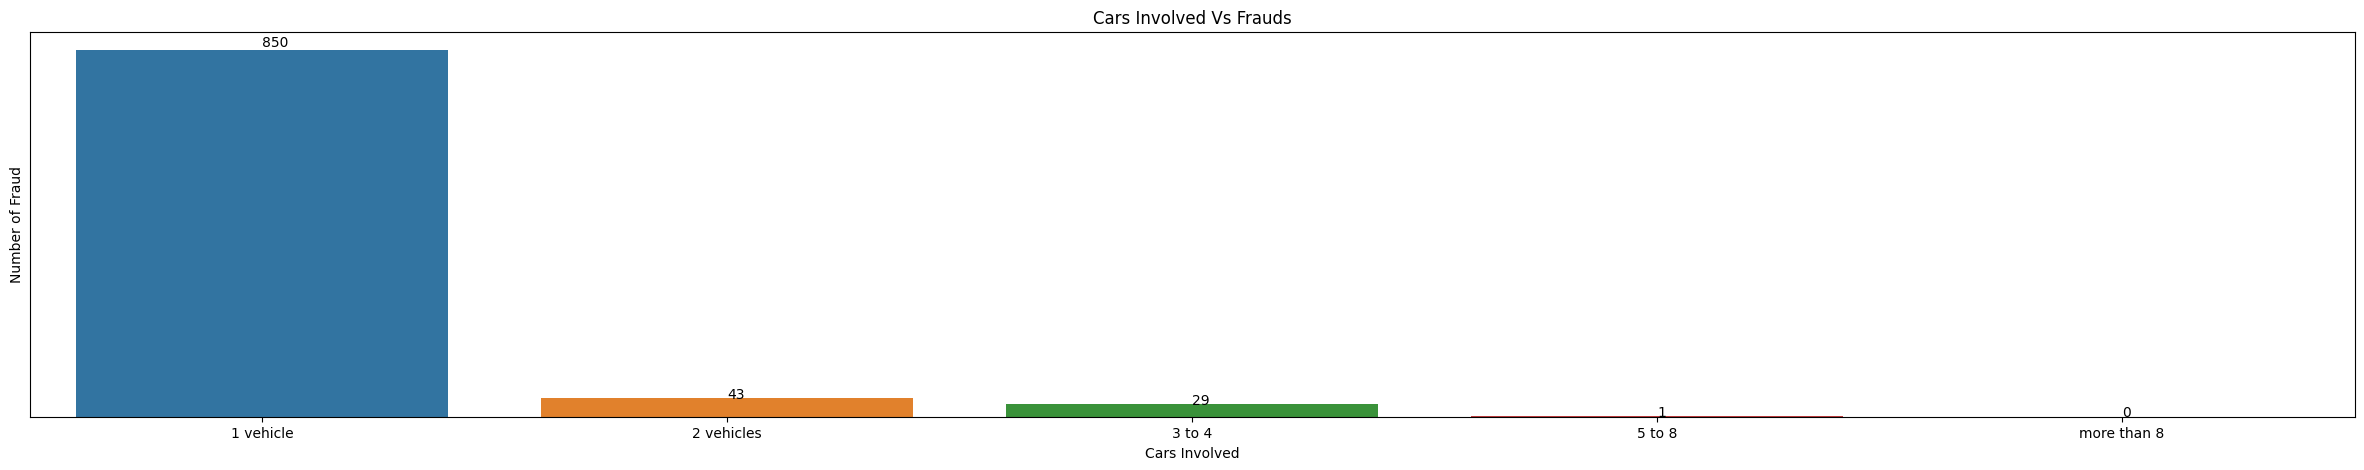

In [69]:
cars = df.groupby('NumberOfCars')['FraudFound'].sum()
plt.figure(figsize=(30,5))
plt.title("Cars Involved Vs Frauds")

ax = sns.barplot(x=cars.index,y=cars.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.4, p.get_height()*1.01))
plt.xlabel("Cars Involved")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

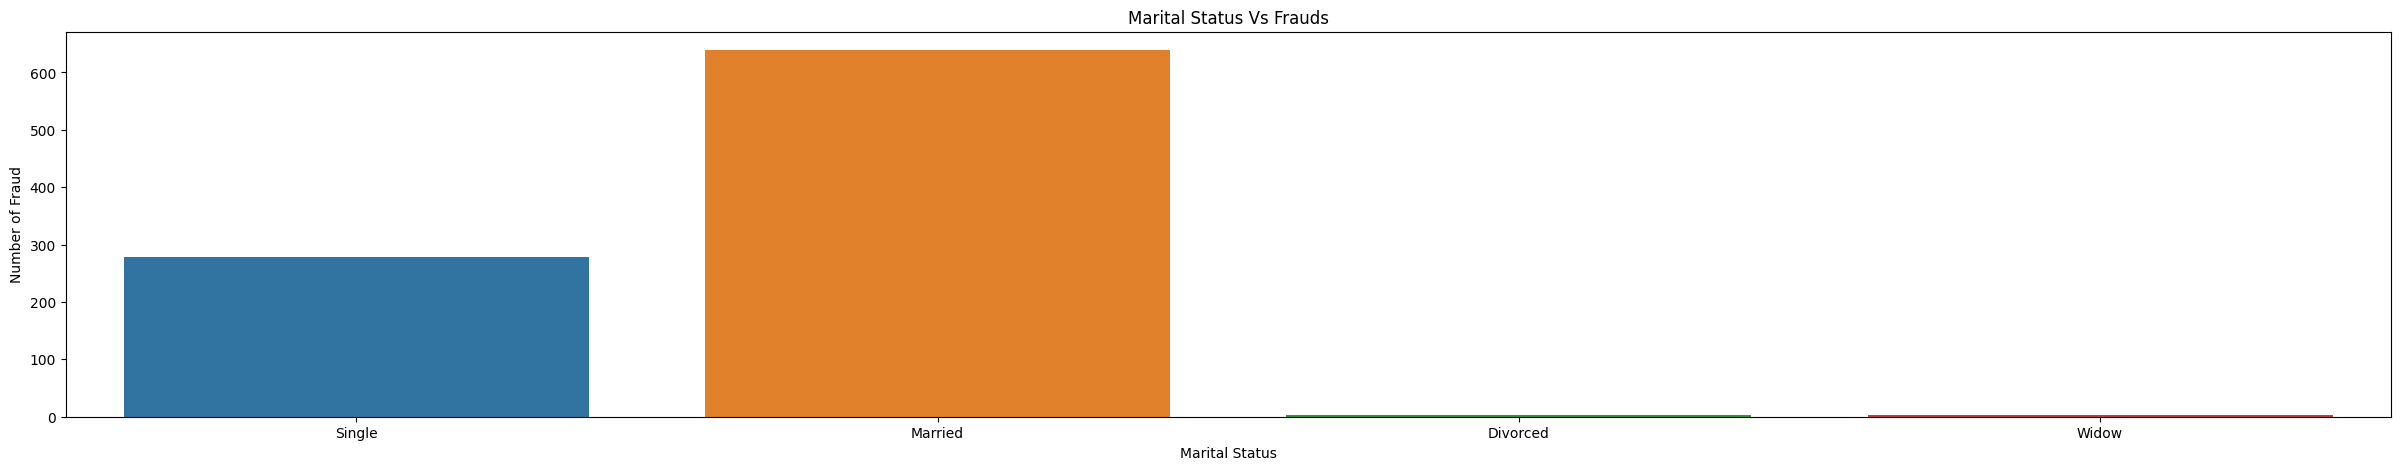

In [70]:
fraud = df[df['FraudFound'] == 1]
plt.figure(figsize=(30,5))
plt.title("Marital Status Vs Frauds")
sns.countplot(x=fraud['MaritalStatus']);
plt.xlabel("Marital Status")
plt.ylabel("Number of Fraud");

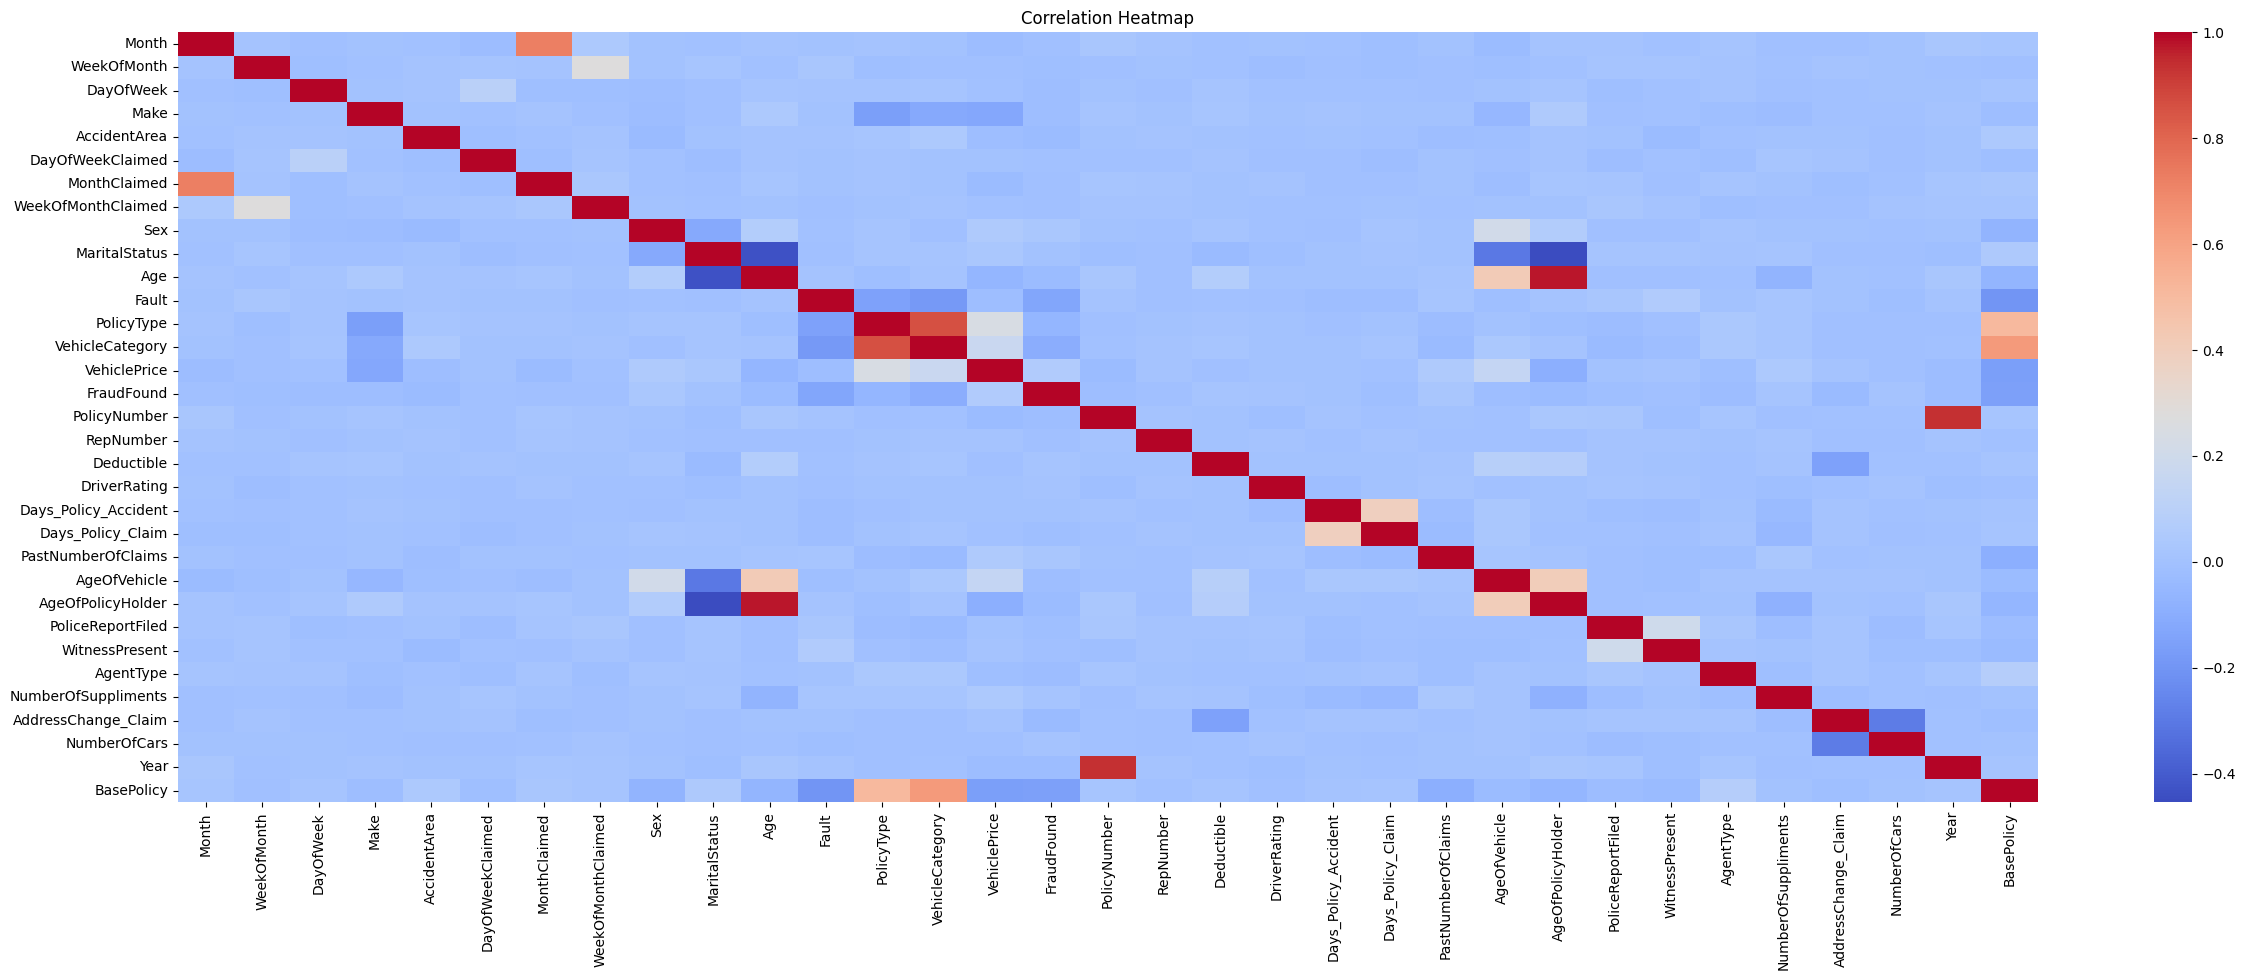

In [71]:
le = LabelEncoder()

cols = df.select_dtypes('O').columns

df[cols]= df[cols].apply(le.fit_transform)
df['Year'] = le.fit_transform(df.Year)
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Can see some strong correlation between some features and we can ignore/remove them

When you're using classifiers like logistic regression and random forest, there are still some good reasons to consider removing highly correlated features:

***Interpretability (Logistic Regression):*** Logistic regression is a linear model that estimates the relationship between the input features and the binary outcome (fraud or no fraud). When you have highly correlated features, it can be challenging to interpret the coefficients of the model. The model might become unstable, and it can be difficult to attribute the impact of each feature on the prediction. Removing correlated features can help improve the interpretability of the logistic regression model.

***Redundancy (Random Forest):*** Random forests are more robust to correlated features compared to linear models like logistic regression. However, highly correlated features can still introduce redundancy in the model. While random forests can handle such redundancy, it might lead to longer training times and a slightly more complex model. Removing correlated features can simplify the model without significantly sacrificing predictive performance.

***Model Efficiency (Random Forest):*** Depending on the size of your dataset and the degree of correlation, keeping highly correlated features can lead to increased computation time during model training, especially with random forests that involve a large number of decision trees. Removing these features can make your model more efficient.

***Feature Importance (Random Forest):*** Random forests provide feature importance scores. When you have correlated features, the importance scores can be spread across those features, making it harder to identify the most important variables. Removing correlated features can result in clearer and more meaningful feature importance rankings.

***Overfitting (Random Forest):*** In some cases, highly correlated features can lead to overfitting in random forest models. The model may perform well on the training data but poorly on new, unseen data. Removing correlated features can help mitigate overfitting.

In [72]:
df_new = df[['Make', 'AccidentArea','Sex',\
       'MaritalStatus','Fault', 'VehicleCategory',\
       'VehiclePrice', 'Year',\
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',\
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',\
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',\
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',\
       'BasePolicy', 'FraudFound']]

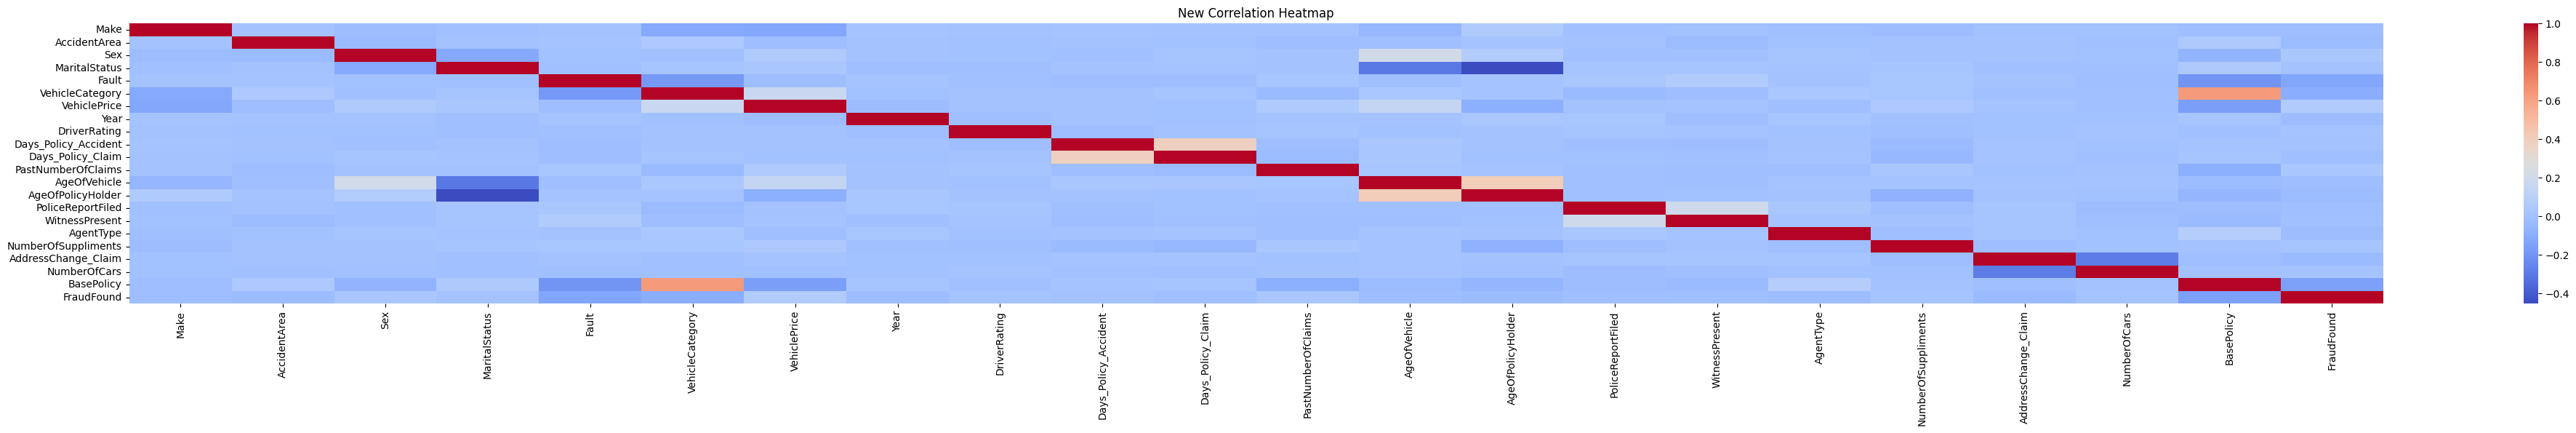

In [73]:
plt.figure(figsize=(50,5))
sns.heatmap(df_new.corr(),cmap="coolwarm")
plt.title("New Correlation Heatmap")
plt.show()

In [74]:
def conf_matrix(y_test,y_pred):
    con_matrix = confusion_matrix(y_test,y_pred)
    con_matrix = pd.DataFrame(con_matrix,range(2),range(2))

    plt.figure(figsize=(3,3))
    plt.title("Confusion Matrix")
    sns.heatmap(con_matrix,annot=True,cbar=False,fmt='g')

# Data Modeling

In [75]:
X = df_new.drop('FraudFound',axis=1)
y = df_new[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11565, 21), (3855, 21), (11565, 1), (3855, 1))

In [76]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform X_train and X_test
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Fit and transform y_train and y_test
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

X_train=X_train_scaled
y_train=y_train_scaled
X_test=X_test_scaled
y_test=y_test_scaled

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train=y_train_encoded
y_test=y_test_encoded

# Logistic Regression

Accuracy of thie model:		 0.9400778210116731


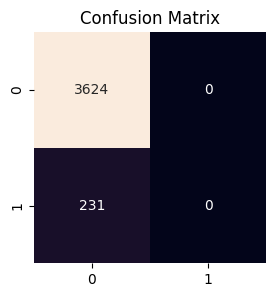

In [77]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

acc_lr=accuracy_score(y_test, lr_pred)
print("Accuracy of this model:\t\t",acc_lr)
conf_matrix(y_test,lr_pred)

# Random Forest Classifier

Accuracy of thie model:		 0.9380025940337224


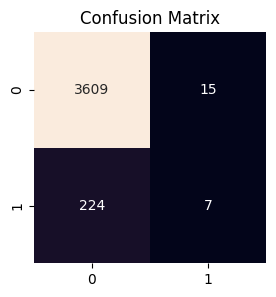

In [78]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

acc_rfc=accuracy_score(y_test, rfc_pred)
print("Accuracy of this model:\t\t",acc_rfc)
conf_matrix(y_test,rfc_pred)

# SVM

Accuracy of this model:		 0.9400778210116731


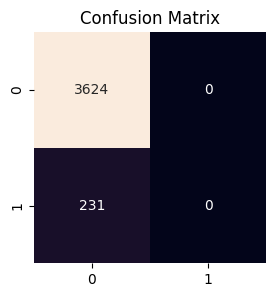

In [79]:
svc = svm.SVC(kernel='linear',C=5)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

acc_svc=accuracy_score(y_test, svc_pred)
print("Accuracy of this model:\t\t",acc_svc)
conf_matrix(y_test,svc_pred)

## **Gaussian** **Naive** **Bayes**

Accuracy of thie model:		 0.8734111543450065


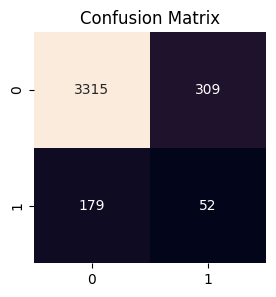

In [80]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)

acc_gnb=accuracy_score(y_test, gnb_pred)
print("Accuracy of this model:\t\t",acc_gnb)
conf_matrix(y_test,gnb_pred)

## **XGBoost**

Accuracy of thie model:		 0.9398184176394293


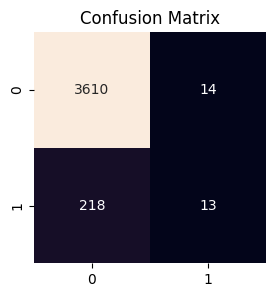

In [81]:
xgbb = xgb.XGBClassifier()
xgbb.fit(X_train,y_train)
xgbb_pred = xgbb.predict(X_test)

acc_xgbb=accuracy_score(y_test, xgbb_pred)
print("Accuracy of this model:\t\t",acc_xgbb)
conf_matrix(y_test,xgbb_pred)

# This Dataset is highly imbalanced as I have mentioned earlier.
What we can do is either upscale the minority class or downscale the majority class to achieve better accuracy score. We would obviously expect a better accuracy score as the dataset is quite large.

## 1. Upscale the Minority Class

In [82]:
n = df_new.FraudFound.value_counts()[0]

df_majority = df_new[df_new.FraudFound==0]
df_minority = df_new[df_new.FraudFound==1]

df_minority_upsampled = resample(df_minority,replace=True,n_samples = n,random_state=42)

df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled.FraudFound.value_counts()

0    14497
1    14497
Name: FraudFound, dtype: int64

In [83]:
X = df_upsampled.drop('FraudFound',axis=1)
y = df_upsampled[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21745, 21), (7249, 21), (21745, 1), (7249, 1))

# Logistic Regression

Accuracy of thie model:		 0.7314112291350531


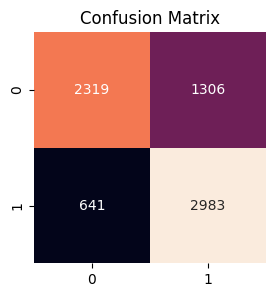

In [84]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_upscale_pred = lr.predict(X_test)

acc_lr_upscale=accuracy_score(y_test, lr_upscale_pred)
print("Accuracy of this model:\t\t",acc_lr_upscale)
conf_matrix(y_test,lr_upscale_pred)

# Random Forest Classifier

Accuracy of thie model:		 0.9889639950337977


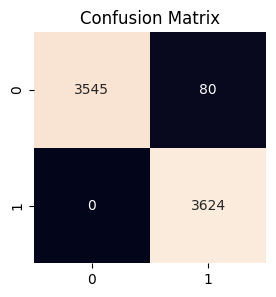

In [85]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_upscale_pred = rfc.predict(X_test)

acc_rfc_upscale=accuracy_score(y_test, rfc_upscale_pred)
print("Accuracy of this model:\t\t",acc_rfc_upscale)
conf_matrix(y_test,rfc_upscale_pred)
report = (classification_report(y_test, rfc_upscale_pred))

## Support Vector Classifier

Accuracy of thie model:		 0.7476893364602014


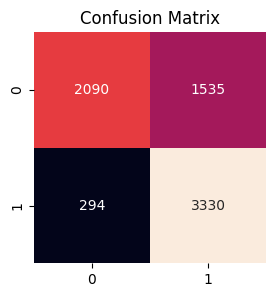

In [86]:
svc = svm.SVC(kernel='rbf')
svc.fit(X_train,y_train)
svc_upscale_pred = svc.predict(X_test)

acc_svc_upscale=accuracy_score(y_test, svc_upscale_pred)
print("Accuracy of this model:\t\t",acc_svc_upscale)
conf_matrix(y_test,svc_upscale_pred)

## **Gaussian Naive Bayes**

Accuracy of this model:		 0.7274106773348048


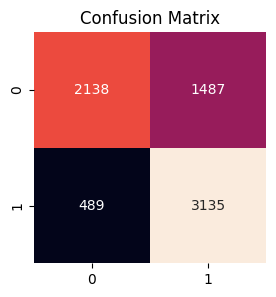

In [87]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_upscale_pred = gnb.predict(X_test)

acc_gnb_upscale=accuracy_score(y_test, gnb_upscale_pred)
print("Accuracy of this model:\t\t",acc_gnb_upscale)
conf_matrix(y_test,gnb_upscale_pred)

## **XGBoost Classifier**

Accuracy of this model:		 0.8928128017657608


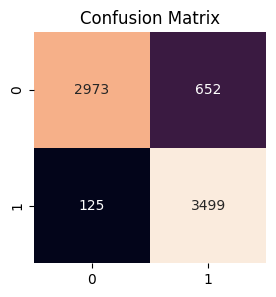

In [88]:
xgbb = xgb.XGBClassifier()
xgbb.fit(X_train,y_train)
xgbb_upscale_pred = xgbb.predict(X_test)

acc_xgbb_upscale=accuracy_score(y_test, xgbb_upscale_pred)
print("Accuracy of this model:\t\t",acc_xgbb_upscale)
conf_matrix(y_test,xgbb_upscale_pred)

## 2. Downscale Majority class

In [89]:
n = df_new.FraudFound.value_counts()[1]

df_majority = df_new[df_new.FraudFound==0]
df_minority = df_new[df_new.FraudFound==1]

df_majority_downsampled = resample(df_majority,replace=False,n_samples = n,random_state=42)

df_downsampled = pd.concat([df_minority,df_majority_downsampled])
df_downsampled.FraudFound.value_counts()

1    923
0    923
Name: FraudFound, dtype: int64

In [90]:
X = df_downsampled.drop('FraudFound',axis=1)
y = df_downsampled[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1384, 21), (462, 21), (1384, 1), (462, 1))

## Logistic Regression

Accuracy of thie model:		 0.7077922077922078


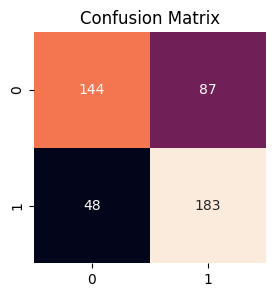

In [91]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_downscale_pred = lr.predict(X_test)

acc_lr_downscale=accuracy_score(y_test, lr_downscale_pred)
print("Accuracy of this model:\t\t",acc_lr_downscale)
conf_matrix(y_test,lr_downscale_pred)

## RandomForest Classifier

Accuracy of thie model:		 0.7467532467532467


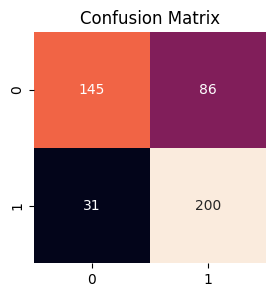

In [92]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_downscale_pred = rfc.predict(X_test)

acc_rfc_downscale=accuracy_score(y_test, rfc_downscale_pred)
print("Accuracy of this model:\t\t",acc_rfc_downscale)
conf_matrix(y_test,rfc_downscale_pred)

## Support Vector Classifier

Accuracy of thie model:		 0.7424242424242424


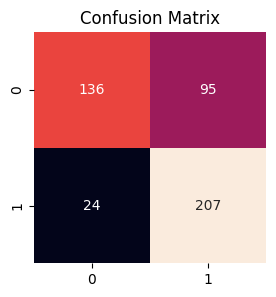

In [93]:
svc = svm.SVC(kernel='linear')
svc.fit(X_train,y_train)
svc_downscale_pred = svc.predict(X_test)

acc_svc_downscale=accuracy_score(y_test, svc_downscale_pred)
print("Accuracy of this model:\t\t",acc_svc_downscale)
conf_matrix(y_test,svc_downscale_pred)

## **Gaussian Naive Bayes**

Accuracy of this model:		 0.7186147186147186


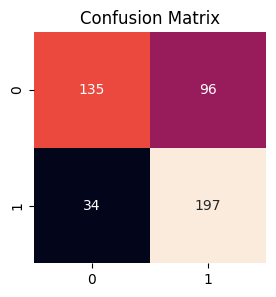

In [94]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_downscale_pred = gnb.predict(X_test)

acc_gnb_downscale=accuracy_score(y_test, gnb_downscale_pred)
print("Accuracy of this model:\t\t",acc_gnb_downscale)
conf_matrix(y_test,gnb_downscale_pred)

## **XGBoost**

Accuracy of this model:		 0.7294372294372294


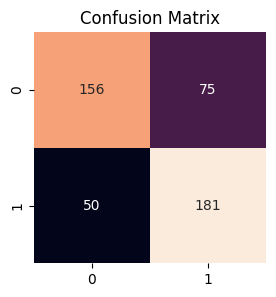

In [95]:
xgbb = xgb.XGBClassifier()
xgbb.fit(X_train,y_train)
xgbb_downscale_pred = xgbb.predict(X_test)

acc_xgbb_downscale=accuracy_score(y_test, xgbb_downscale_pred)
print("Accuracy of this model:\t\t",acc_xgbb_downscale)
conf_matrix(y_test,xgbb_downscale_pred)

## Comparison of various models

In [96]:
data = {'Model':['Logistic Regression','UpScale Logistic Regression','DownScale Logistic Regression',
                 'RandomForest Classifier','UpScale RandomForest Classifier','DownScale RandomForest Classifier',
                 'Support Vector Classifier','Upscale Support Vector Classifier','DownScale Support Vector Classifier',
                 'Gaussian NaiveBayes','Upscale Gaussian NaiveBayes','Downscale Gaussian NaiveBayes',
                 'XGBoost Classifier','Upscale XGBoost Classifier','Downscale XGBoost Classifier'],

        'Accuracy Score':[acc_lr,acc_lr_upscale,acc_lr_downscale,acc_rfc,acc_rfc_upscale,acc_rfc_downscale,acc_svc,acc_svc_upscale,acc_svc_downscale,
                          acc_gnb,acc_gnb_upscale,acc_gnb_downscale,acc_xgbb,acc_xgbb_upscale,acc_gnb_downscale]}

comparison_table=pd.DataFrame(data)
print(comparison_table)

                                  Model  Accuracy Score
0                   Logistic Regression        0.940078
1           UpScale Logistic Regression        0.731411
2         DownScale Logistic Regression        0.707792
3               RandomForest Classifier        0.938003
4       UpScale RandomForest Classifier        0.988964
5     DownScale RandomForest Classifier        0.746753
6             Support Vector Classifier        0.940078
7     Upscale Support Vector Classifier        0.747689
8   DownScale Support Vector Classifier        0.742424
9                   Gaussian NaiveBayes        0.873411
10          Upscale Gaussian NaiveBayes        0.727411
11        Downscale Gaussian NaiveBayes        0.718615
12                   XGBoost Classifier        0.939818
13           Upscale XGBoost Classifier        0.892813
14         Downscale XGBoost Classifier        0.718615


In [100]:
max_accuracy_model = comparison_table.loc[comparison_table['Accuracy Score'].idxmax(), 'Model']
max_accuracy_score = comparison_table.loc[comparison_table['Accuracy Score'].idxmax(), 'Accuracy Score']
print("Model with Maximum Accuracy :" ,max_accuracy_model)
print("Accuracy Score              :" ,max_accuracy_score)
print(report)

Model with Maximum Accuracy : UpScale RandomForest Classifier
Accuracy Score              : 0.9889639950337977
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3625
           1       0.98      1.00      0.99      3624

    accuracy                           0.99      7249
   macro avg       0.99      0.99      0.99      7249
weighted avg       0.99      0.99      0.99      7249

